In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd 
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Import the Dataset 

 - Training
 - Test

In [ ]:
housePricesData = pd.read_csv('train.csv')
housePricesDataTest = pd.read_csv('test.csv')
housePricesData.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


I will need to analyze the objects types in the columns, so I can remove non-numerical columns quite easily

Dropping the 'id' column as it gives no information 

In [ ]:
housePricesData.drop(columns=["Id"],inplace=True)

In [ ]:
print(housePricesData.dtypes.to_string())

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


Using this function we can select columns that only contain floats and ints.

In [ ]:
# select the float & int64 columns
df_num = housePricesData.select_dtypes(include=[np.float, np.int64])
df_num

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


Check for values that are Null or NA


In [ ]:
print(df_num.isnull().sum().to_string())

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0


Remove Nane values by using the fillNA function (Median)

In [ ]:


df_num['LotFrontage'].fillna(df_num['LotFrontage'].median(), inplace=True)
df_num['GarageYrBlt'].fillna(df_num['GarageYrBlt'].median(), inplace=True)
df_num['MasVnrArea'].fillna(df_num['MasVnrArea'].median(), inplace=True)
#df_num['Tonnage'].fillna(df_num['Tonnage'].median(), inplace=True)
print(df_num.isnull().sum().to_string())

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0


/Users/aarjavi/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


From inspection of the dataframe, all of the NaN values have been eliminated

In [ ]:
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


      MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0           True         True     True         True         True       True   
1           True         True     True         True         True       True   
2           True         True     True         True         True       True   
3           True         True     True         True         True       True   
4           True         True     True         True         True       True   
...          ...          ...      ...          ...          ...        ...   
1455        True         True     True         True         True       True   
1456        True         True     True         True         True       True   
1457        True         True     True         True         True       True   
1458        True         True     True         True         True       True   
1459        True         True     True         True         True       True   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFin

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


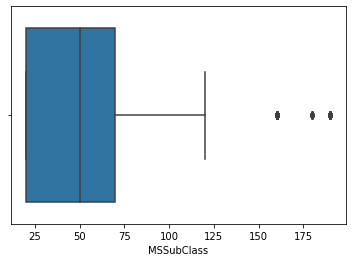

In [ ]:
import seaborn as sns
sns.boxplot(x=df_num["MSSubClass"])

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
Q2 = Q3 = df_num.quantile(0.5)
IQR = Q3 - Q1
(Q1, Q3, IQR)
# upper_lim = Q3 + 1.5 * IQR
# lower_lim = Q1 - 1.5 * IQR
upper_lim = df_num.max()
lower_lim = df_num.min()
#print(upper_lim, lower_lim)

#for clm in df_num.columns:
    #df_num = df_num[(df_num[clm]< df_num[clm].max()) & (df_num[clm] > df_num[clm].min())]
    #print(df_num)

    #    df_num = df_num[(df_num[clm]< upper_lim[clm]) & (df_num[clm] > lower_lim[clm])]
clm = "MSSubClass"
#df_num

df_num1 = df_num[(df_num <= upper_lim ) & (df_num >= lower_lim )]
#df_num[(df_num[clm]< df_num[clm].max()) & (df_num[clm] > df_num[clm].min())]
df_num1
print((df_num <= upper_lim ) & (df_num >= lower_lim ))
df_num1

# Create 5 New Features using Engineering Judgement

 - HVAC Square Footage
 - Tonnage
 - Sale Condition Ratio
 - Manually One Hot Encode based on the Sale Condition
 - Vehicle Ratio

In [ ]:
HVAC_square_footage = ['1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', 'GrLivArea']

"""This feature was created to determine the total square footage needed for Heating Ventatilation and Cooling Equipment.
This will become exptionally usefull when determining the Btu and Tonnage needed for equipements. This can technically tie 
into operational cost of the residential area, leading to have an effect on the sales price
"""
df_num['HVACSquareFootage'] = df_num[HVAC_square_footage[0]] + df_num[HVAC_square_footage[1]] + df_num[HVAC_square_footage[2]] + df_num[HVAC_square_footage[3]]

def TonnageCalculator(totSquareFootage):
    """
    This is a calcualtor that determines the typical tonnage by square foot in residential areas.
    The Reference Link: https://kobiecomplete.com/cool-tips/btu-calculator/
    This will be usefull to detemine the amount of every the residential propery is consuming, which may have 
    an impact on the sales price of the property, due to operational costs of the buiding
    
    """
    if 750 <= totSquareFootage <= 1000:
        return 2
    
    if 1050 <= totSquareFootage <= 1400:
        return 2.5
    
    if 1450 <= totSquareFootage <=1700:
        return 3
    
    if 1750 <= totSquareFootage <= 1900:
        return 3.5
    
    if 1950 <= totSquareFootage <=2200:
        return 4
    
    if totSquareFootage >= 2250:
        return 5  
    
# 2nd feature has been created which tells us what the amount of energy by ton the property is going to be used.
df_num['Tonnage'] = df_num['HVACSquareFootage'].apply(TonnageCalculator)
df_num['Tonnage'].fillna(df_num['Tonnage'].median(), inplace=True)

In [ ]:
""" These features were created to determine the effect of Condition of the residential property having an effect on the 
sales price. The fist step was to obtain the Sale Condition Ratio relative to the mean of all of the sales price. The next step 
was to translate the individual sale conditions into their own respective columns"""

df_num['SaleCondition'] = housePricesData['SaleCondition'].fillna(housePricesData['SaleCondition'].mode())
saleCondition = df_num.SaleCondition.unique().tolist()

def Sale_Condition_Ratio(s):
    
    mean = df_num['SalePrice'].mean()
    val = s / mean
    
    return val


def Normal_Column_Creation(s):
    
    if s['SaleCondition'] == 'Normal':
        
        return s['SaleConditionRatio']
    
    else:
        return int(0)
    
def Abnorml_Column_Creation(s):
    
    if s['SaleCondition'] == 'Abnorml':
        
        return s['SaleConditionRatio']
    
    else:
        return int(0)
    
def Partial_Column_Creation(s):
    
    if s['SaleCondition'] == 'Partial':
        
        return s['SaleConditionRatio']
    
    else:
        return int(0)
    
def AdjLand_Column_Creation(s):
    
    if s['SaleCondition'] == 'AdjLand':
        
        return s['SaleConditionRatio']
    
    else:
        return int(0)
    
def Alloca_Column_Creation(s):
    
    if s['SaleCondition'] == 'Alloca':
        
        return s['SaleConditionRatio']
    
    else:
        return int(0)
    
def Family_Column_Creation(s):
    
    if s['SaleCondition'] == 'Family':
        
        return s['SaleConditionRatio']
    
    else:
        return int(0)

    
# 3rd feature created to determine the sale ratio relative to the Sale Condition.

df_num['SaleConditionRatio'] = df_num['SalePrice'].apply(Sale_Condition_Ratio)

# 4th feature created by manually one hot encoding the Sale Condition Column
df_num['NormalSale']          =   df_num.apply(Normal_Column_Creation,axis=1)
df_num['AbnormalSale']          = df_num.apply(Abnorml_Column_Creation,axis=1)
df_num['PartialSale']          =  df_num.apply(Partial_Column_Creation,axis=1)
df_num['AdjLandSale']          =  df_num.apply(AdjLand_Column_Creation,axis=1)
df_num['AllocaSale']          =   df_num.apply(Alloca_Column_Creation,axis=1)
df_num['Family']          =       df_num.apply(Family_Column_Creation,axis=1)
df_num.drop(columns=["SaleCondition"],inplace=True)



In [ ]:
# 5th Feature
"""The next feature that I want to create is the ratio of number of cars fitting into the square footage. The average square
footage of a car is  around 100 square foot. This may apply the logic a human does when looking to buy a home, they make check, whether
or not their car can easily fit inside"""


def VehicleRatioCalculator(s):
    try:
        value = (s['GarageCars'] * 100) / s['GarageArea']
    except ZeroDivisionError:
        value = 0

    return value

df_num['VehicleRatio']          =       df_num.apply(VehicleRatioCalculator,axis=1)
df_num['VehicleRatio'].fillna(df_num['VehicleRatio'].median(), inplace=True)

From Running the House Prices Dataframe, you can see the multitude of new features that have been created

In [ ]:
df_num.head(20)

# Calculate the Variance of all the numerical features. 
* From Running the Variance Calculation on the pandas dataframe, I will be able to eliminate features that posses low variance.
* If the variance is low or close to zero, then a feature is approximately constant and will not improve the performance of the model.

In [ ]:
df_num.var()

Dropping features with low variance, as they are not as beneficial to include in the Machine Learning Model 

In [ ]:
# LowVarianceColumns = ['GarageCars', 'Fireplaces', 'KitchenAbvGr',
#                       'BedroomAbvGr','HalfBath','FullBath','BsmtHalfBath',
#                        'BsmtFullBath','VehicleRatio', 'Family','AllocaSale', 
#                       'AdjLandSale','PartialSale','AbnormalSale','NormalSale',
#                       'SaleConditionRatio','Tonnage' ]


LowVarianceColumns = ['Fireplaces', 'KitchenAbvGr',
                      'BedroomAbvGr','HalfBath','FullBath','BsmtHalfBath',
                       'BsmtFullBath', 'Family','AllocaSale', 
                      'AdjLandSale','PartialSale','AbnormalSale','NormalSale','SaleConditionRatio']
     
df_num.drop(columns=LowVarianceColumns,inplace=True)

In [1]:
df_num.head()

NameError: ignored

# Check the Correlation in the dataframe
* We are trying to determine if High correlation exists between two variables which means they have similar information.
* generally anything bigger than 0.5 or 0.6 exists between pairs, it is recommneded to drop it

In [ ]:

df_data = df_num.drop(columns="SalePrice")
df_data.corr()

In [ ]:
df_correl1 = df_data.corr()[df_data.corr() > 0.6]
df_correl2 = df_correl1[df_correl1 < 1 ]
dfc3 = pd.DataFrame(list(df_correl2.stack().index))
dfc3

Ideally we shoud drop the columns which have high correlation with other columns, but based on repeated testing and training it is found that doing so degrades the performance everytime. So not dropping features based on high correlation values.

In [ ]:
#df_num.drop(columns=['TotRmsAbvGrd','2ndFlrSF', 'GrLivArea','GarageCars'],inplace=True)
#df_num

# Feature Importance
- Normalize the dataset 
- Apply the Random Forest Regressor
- Obtain the top 10 features in current dataset

In [ ]:
# Normalize the dataset
x = df_num.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns=df_num.columns)
X = df.drop(columns='SalePrice')
y = df_num['SalePrice']
print(X.isnull().sum().to_string())
y.isnull().sum()
y

In [ ]:
regressor = RandomForestRegressor(n_estimators=10, random_state = 0)
regressor.fit(X,y)

In [ ]:
dict(reversed(sorted(zip(regressor.feature_importances_, X.columns.values))))

In [ ]:
features = X.columns
importances = regressor.feature_importances_
indices = np.argsort(importances)[-10:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Decision Tree Regressor

In [ ]:
topTenFeatures = []
for i in indices:
    topTenFeatures.append(features[i])

topX = X[topTenFeatures]

regressor = DecisionTreeRegressor(max_depth=5)

X_train, X_test, y_train, y_test = train_test_split(topX, y, test_size=0.2)

regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)

score = regressor.score(X_test, y_test)
print(score)

In [ ]:
# Fit the regressor, set max_depth = 4
regr = DecisionTreeRegressor(max_depth=4)
model = regr.fit(X_train, y_train)
text_representation = tree.export_text(regr)
print(text_representation)

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regr, feature_names=df.columns, filled=True)

Below is the attempt to improve model by reducing using top5 features instead of 10

In [ ]:
top5X = X[topTenFeatures[:5]]

regressor = DecisionTreeRegressor()

X_train, X_test, y_train, y_test = train_test_split(top5X, y, test_size=0.2)

regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)

score = regressor.score(X_test, y_test)
print(score)

But it gives deteriotion in performance so going with top 10 features

Generating new features with PCA and checking for improvement in model

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(topX)
x_pca = pd.DataFrame(x_pca)
x_pca.head()

In [ ]:
explained_variance = pca.explained_variance_ratio_
explained_variance

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

In [ ]:
plt.plot( np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
topXP = topX #top 10 features
regressor = DecisionTreeRegressor(max_depth=5)
X_train, X_test, y_train, y_test = train_test_split(topXP, y, test_size=0.2)
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
score = regressor.score(X_test, y_test)
print("Num of PCA components, score")
print("0,    ",score)

for j in range(0,10):
    
    x_pca1 = x_pca[j]
    topXP = pd.concat([topXP, x_pca1], axis = 1)
    X_train, X_test, y_train, y_test = train_test_split(topXP, y, test_size=0.2,random_state=0)
    regressor.fit(X_train,y_train)
    y_pred = regressor.predict(X_test)
    score = regressor.score(X_test, y_test)
    print(j+1,",    ",score)

As illustrated above, the data set with PCA components = 3 gives max performance
so finalising the data accordingly as top10 features obtained from Random Forest Regressor and first 3 PCA components

In [ ]:
df_num = pd.concat([df_num,x_pca.iloc[:,:4]],axis=1)
df_num.head()

We will be using above generated dataset for other ML algos now
